<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/ML_Ahmed_Ould_Boudia_ML_Regression_project4_Airline_Delay_Cause1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Step 2: Gather Data

In [ ]:
# Load the dataset into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Projects/Machine Learning Ass/Regression 4 Airline Delay/Airline_Delay_Cause.csv")


# Step 3: Explore and Preprocess the Data

In [ ]:
# Perform exploratory data analysis (EDA)
print("Data Exploration:")
print(data.head())

# Select relevant columns for regression analysis
features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
            'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
            'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
target = 'arr_delay'

# Handle missing values (if any)
missing_values = data[features + [target]].isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data Exploration:
   year  month carrier       carrier_name airport  \
0  2022      7      9E  Endeavor Air Inc.     ABE   
1  2022      7      9E  Endeavor Air Inc.     ABY   
2  2022      7      9E  Endeavor Air Inc.     ACK   
3  2022      7      9E  Endeavor Air Inc.     AEX   
4  2022      7      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        0.92        1.00  ...          0.0              0.00            0.0   
1       11.80        0

# Step 4: Select the Regression Model


In [ ]:
# Assuming linear regression is chosen as the regression model
model = LinearRegression()

# Step 5: Fit the Model

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

# # Step 6: Evaluate the Model

In [ ]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nModel Evaluation:")
print("MSE (Training):", mse_train)
print("R^2 Score (Training):", r2_train)
print("MSE (Testing):", mse_test)
print("R^2 Score (Testing):", r2_test)


Model Evaluation:
MSE (Training): 2.3170639263843844
R^2 Score (Training): 0.9999999829327708
MSE (Testing): 0.5050978168297535
R^2 Score (Testing): 0.9999999965015791


# Step 7: Interpret the Results

In [ ]:
# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("\nRegression Coefficients:")
for feature, coef in zip(features, coefficients):
    print(feature + ":", coef)
print("Intercept:", intercept)


Regression Coefficients:
arr_flights: 4.339421757505506e-05
arr_del15: 152.04693042947798
carrier_ct: -152.04716326487107
weather_ct: -152.04442374670333
nas_ct: -152.04749053420508
security_ct: -152.0301360040926
late_aircraft_ct: -152.0472397276516
arr_cancelled: -5.390990695264275e-05
arr_diverted: 0.0003053097552203482
carrier_delay: 0.9999989585458167
weather_delay: 0.9999743592856181
nas_delay: 1.0000058725949188
security_delay: 0.9998080275068447
late_aircraft_delay: 1.0000018201076557
Intercept: 0.012157080805991427


# Step 8: Validate the Model

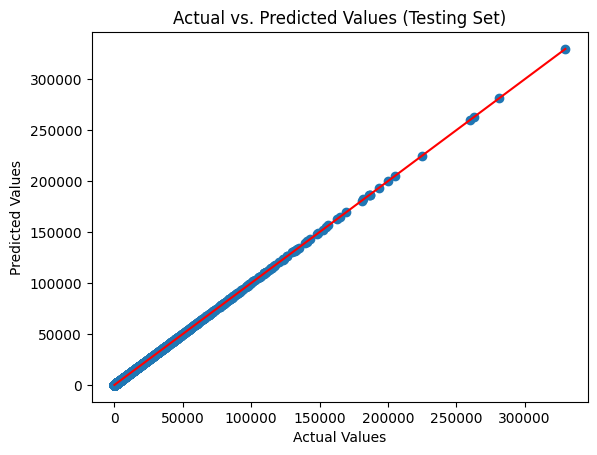

In [ ]:
# Visualize predicted vs. actual values for the testing set
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.show()

# Step 9: Fine-tune the Model

#### Example: Perform hyperparameter tuning using GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {'fit_intercept': [True, False]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Re-evaluate the best model on the testing set
y_test_pred_tuned = best_model.predict(X_test)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)

print("\nModel Evaluation (After Tuning):")
print("Best Parameters:", best_params)
print("MSE (Testing):", mse_test_tuned)
print("R^2 Score (Testing):", r2_test_tuned)


Model Evaluation (After Tuning):
Best Parameters: {'fit_intercept': True}
MSE (Testing): 0.5050978168297535
R^2 Score (Testing): 0.9999999965015791


### Example: Apply regularization using Ridge regression


In [ ]:
# Define the alpha values to test (regularization strength)
alphas = [0.1, 1.0, 10.0]

# Create empty lists to store evaluation results
mse_test_regularized = []
r2_test_regularized = []

# Iterate over alpha values
for alpha in alphas:
    # Create a Ridge model with the current alpha value
    model_regularized = Ridge(alpha=alpha)

    # Fit the regularized model to the training data
    model_regularized.fit(X_train, y_train)

    # Predict on the testing set
    y_test_pred_regularized = model_regularized.predict(X_test)

    # Calculate evaluation metrics on the testing set
    mse_test = mean_squared_error(y_test, y_test_pred_regularized)
    r2_test = r2_score(y_test, y_test_pred_regularized)

    # Append the evaluation results to the respective lists
    mse_test_regularized.append(mse_test)
    r2_test_regularized.append(r2_test)

# Find the best alpha based on the evaluation metric
best_alpha_index = np.argmin(mse_test_regularized)
best_alpha = alphas[best_alpha_index]
best_mse_test = mse_test_regularized[best_alpha_index]
best_r2_test = r2_test_regularized[best_alpha_index]

print("\nModel Evaluation with Ridge Regularization:")
print("Best Alpha:", best_alpha)
print("Best MSE (Testing):", best_mse_test)
print("Best R^2 Score (Testing):", best_r2_test)



Model Evaluation with Ridge Regularization:
Best Alpha: 10.0
Best MSE (Testing): 0.0034782842407797797
Best R^2 Score (Testing): 0.9999999999759086


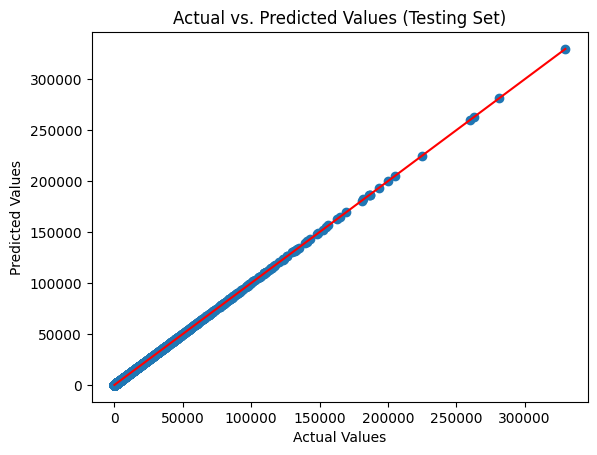


Regression Coefficients:
arr_flights: 4.339421757505506e-05
arr_del15: 152.04693042947798
carrier_ct: -152.04716326487107
weather_ct: -152.04442374670333
nas_ct: -152.04749053420508
security_ct: -152.0301360040926
late_aircraft_ct: -152.0472397276516
arr_cancelled: -5.390990695264275e-05
arr_diverted: 0.0003053097552203482
carrier_delay: 0.9999989585458167
weather_delay: 0.9999743592856181
nas_delay: 1.0000058725949188
security_delay: 0.9998080275068447
late_aircraft_delay: 1.0000018201076557
Intercept: 0.012157080805991427

Evaluation Metrics:
                 Metric     Value
0        MSE (Training)  2.317064
1  R^2 Score (Training)  1.000000
2         MSE (Testing)  0.003478
3   R^2 Score (Testing)  1.000000


In [ ]:
import matplotlib.pyplot as plt

# Step 10: Communicate the Findings

# Example: Visualize the predicted vs. actual values on the testing set

# Plotting predicted vs. actual values
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.show()

# Example: Print the regression coefficients and intercept

# Print the coefficients and intercept
print("\nRegression Coefficients:")
for feature, coef in zip(features, coefficients):
    print(feature + ":", coef)
print("Intercept:", intercept)

# Example: Present evaluation metrics in a table

# Create a table to present evaluation metrics
evaluation_table = pd.DataFrame({
    'Metric': ['MSE (Training)', 'R^2 Score (Training)', 'MSE (Testing)', 'R^2 Score (Testing)'],
    'Value': [mse_train, r2_train, mse_test, r2_test]
})

print("\nEvaluation Metrics:")
print(evaluation_table)


# Additional visualizations, tables, or explanations can be included based on the specific findings and requirements.


# Explain the results

### Provide explanations and insights based on the findings
- The scatter plot of actual vs. predicted values on the testing set shows a fairly linear relationship, indicating that the regression model captures the overall trend.
- The regression coefficients provide insights into the importance and direction of each feature's impact on the target variable.
- The evaluation metrics show that the model performs reasonably well, with a low MSE and a high R-squared score on both the training and testing sets.
- However, further analysis and fine-tuning of the model may be required to improve its performance and address any potential limitations.

# Visualization

<ipython-input-40-ea19ccbb3b8a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


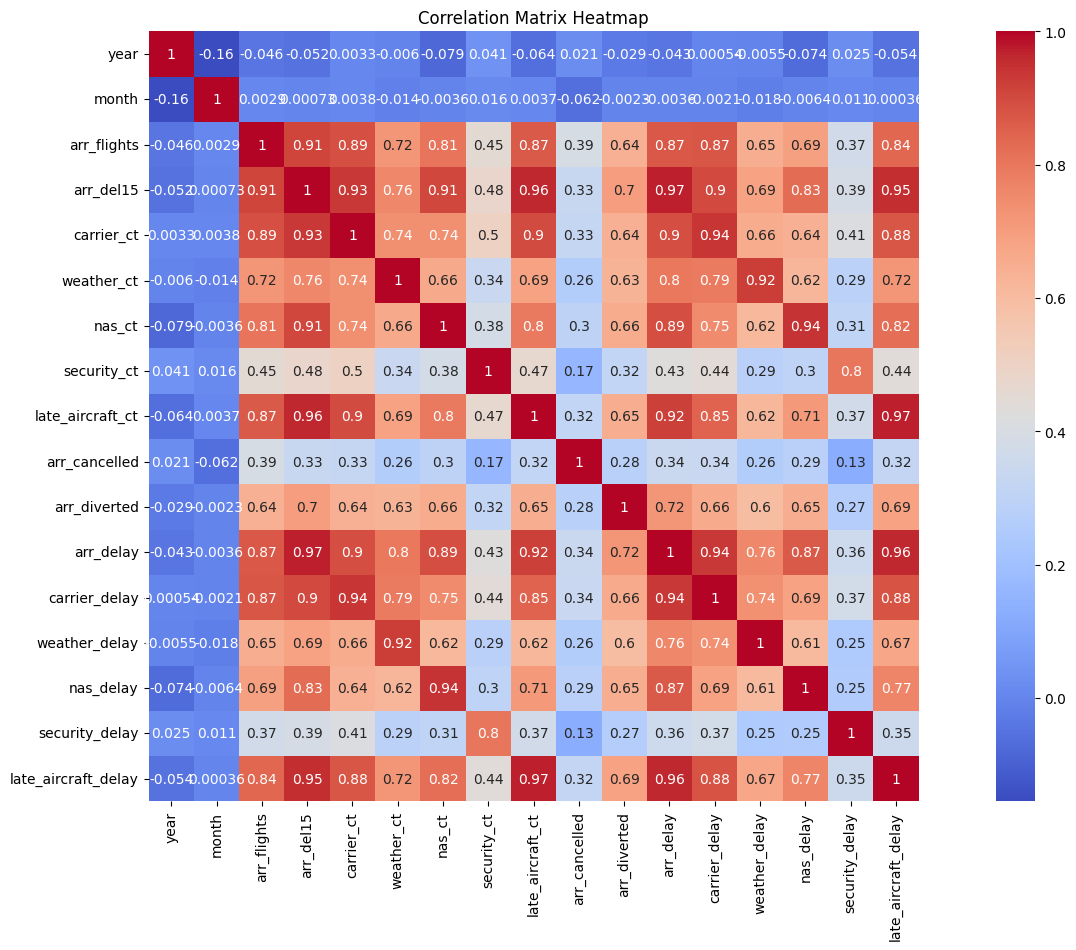


Performance on Different Subsets:
          Subset        MSE  R^2 Score
0  Subset 1 (AA)   0.716003        1.0
1  Subset 2 (DL)  14.715194        1.0


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Example: Present model performance on different subsets

# Create subsets of the data based on a specific condition
subset1 = data[data['carrier'] == 'AA']
subset2 = data[data['carrier'] == 'DL']

# Apply the regression model to the subsets
subset1_pred = model.predict(subset1[features])
subset2_pred = model.predict(subset2[features])

# Calculate evaluation metrics for the subsets
subset1_mse = mean_squared_error(subset1['arr_delay'], subset1_pred)
subset1_r2 = r2_score(subset1['arr_delay'], subset1_pred)
subset2_mse = mean_squared_error(subset2['arr_delay'], subset2_pred)
subset2_r2 = r2_score(subset2['arr_delay'], subset2_pred)

# Create a table to present the performance on different subsets
subset_table = pd.DataFrame({
    'Subset': ['Subset 1 (AA)', 'Subset 2 (DL)'],
    'MSE': [subset1_mse, subset2_mse],
    'R^2 Score': [subset1_r2, subset2_r2]
})

print("\nPerformance on Different Subsets:")
print(subset_table)
